In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Load data
df = pd.read_excel("data_gabungan_luas_produksi.xlsx")

print("=== ANALISIS KORELASI DATA LUAS LAHAN DAN PRODUKSI GARAM ===")
print(f"Shape data: {df.shape}")
print(f"Kolom: {list(df.columns)}")

=== ANALISIS KORELASI DATA LUAS LAHAN DAN PRODUKSI GARAM ===
Shape data: (35, 13)
Kolom: ['KABKOTA', 'Luas_2019', 'Luas_2020', 'Luas_2021', 'Luas_2022', 'Luas_2023', 'Luas_2024', 'Produksi_2019', 'Produksi_2020', 'Produksi_2021', 'Produksi_2022', 'Produksi_2023', 'Produksi_2024']


In [3]:
# Hapus kolom KABKOTA dan ambil hanya kolom numerik
kolom_numerik = [col for col in df.columns if col != 'KABKOTA']
df_numerik = df[kolom_numerik].copy()

print(f"Kolom yang akan dianalisis: {kolom_numerik}")
print(f"Shape data numerik: {df_numerik.shape}")

# Cek data
print(f"\nInfo data numerik:")
print(df_numerik.info())

print(f"\nStatistik deskriptif:")
print(df_numerik.describe())

Kolom yang akan dianalisis: ['Luas_2019', 'Luas_2020', 'Luas_2021', 'Luas_2022', 'Luas_2023', 'Luas_2024', 'Produksi_2019', 'Produksi_2020', 'Produksi_2021', 'Produksi_2022', 'Produksi_2023', 'Produksi_2024']
Shape data numerik: (35, 12)

Info data numerik:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Luas_2019      35 non-null     int64  
 1   Luas_2020      35 non-null     int64  
 2   Luas_2021      35 non-null     int64  
 3   Luas_2022      35 non-null     int64  
 4   Luas_2023      35 non-null     int64  
 5   Luas_2024      35 non-null     int64  
 6   Produksi_2019  35 non-null     float64
 7   Produksi_2020  35 non-null     float64
 8   Produksi_2021  35 non-null     float64
 9   Produksi_2022  35 non-null     float64
 10  Produksi_2023  35 non-null     float64
 11  Produksi_2024  35 non-null     float64
dtypes: float64(6), int

In [4]:
# Hitung korelasi Pearson
corr_pearson = df_numerik.corr(method='pearson')

# Hitung korelasi Spearman
corr_spearman = df_numerik.corr(method='spearman')

print("=== KORELASI PEARSON ===")
print(corr_pearson.round(3))

print("\n=== KORELASI SPEARMAN ===")
print(corr_spearman.round(3))

=== KORELASI PEARSON ===
               Luas_2019  Luas_2020  Luas_2021  Luas_2022  Luas_2023  \
Luas_2019          1.000      0.989      0.970      0.958      0.991   
Luas_2020          0.989      1.000      0.973      0.961      0.990   
Luas_2021          0.970      0.973      1.000      0.925      0.978   
Luas_2022          0.958      0.961      0.925      1.000      0.972   
Luas_2023          0.991      0.990      0.978      0.972      1.000   
Luas_2024          0.944      0.935      0.939      0.926      0.939   
Produksi_2019      0.994      0.988      0.970      0.960      0.990   
Produksi_2020      0.864      0.902      0.907      0.886      0.892   
Produksi_2021      0.872      0.887      0.913      0.882      0.899   
Produksi_2022      0.881      0.891      0.911      0.863      0.898   
Produksi_2023      0.968      0.981      0.965      0.944      0.978   
Produksi_2024      0.843      0.876      0.869      0.903      0.871   

               Luas_2024  Produksi_201

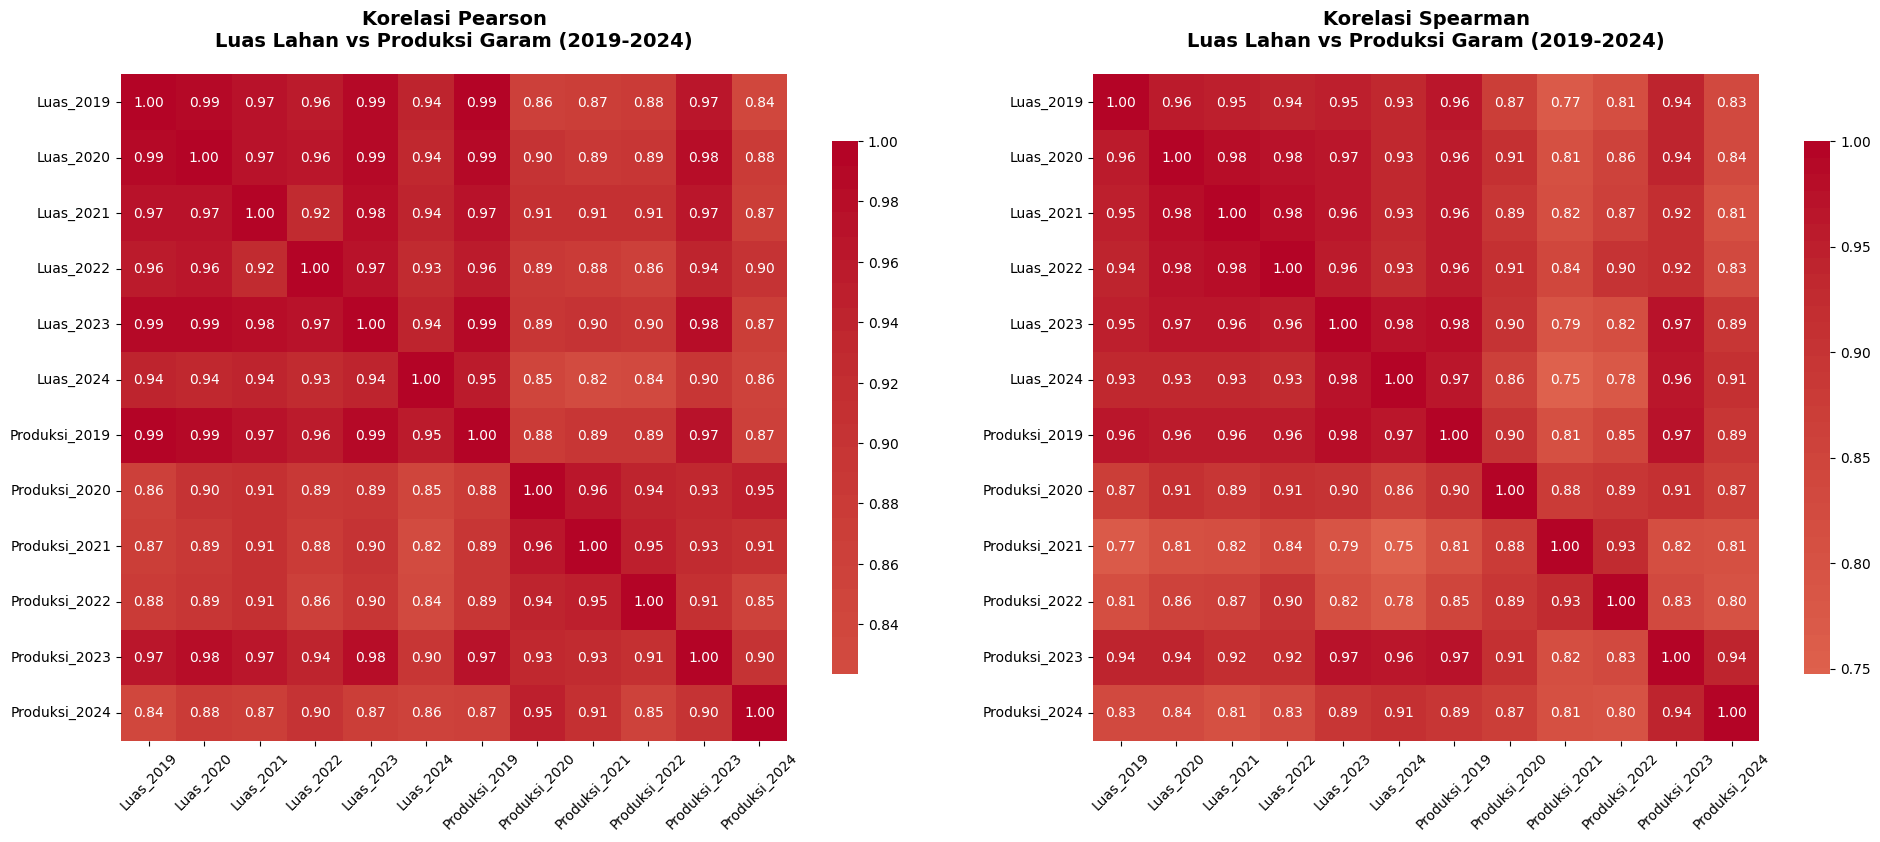

In [5]:
# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("coolwarm")

# Create figure dengan 2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap Korelasi Pearson
sns.heatmap(corr_pearson,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8},
            ax=ax1)
ax1.set_title('Korelasi Pearson\nLuas Lahan vs Produksi Garam (2019-2024)',
              fontsize=14, fontweight='bold', pad=20)
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='y', rotation=0)

# Heatmap Korelasi Spearman
sns.heatmap(corr_spearman,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8},
            ax=ax2)
ax2.set_title('Korelasi Spearman\nLuas Lahan vs Produksi Garam (2019-2024)',
              fontsize=14, fontweight='bold', pad=20)
ax2.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()